# Assessment for Inversion and Optimisation in 2022 <a class="tocSkip"></a>
## Feedback <a class="tocSkip"></a>

Explanation of expected answers and common mistakes.

## Section A - Row Echelon Form, Nullspace and Minimum Norm Solution
Consider the following matrix

$$
\underline{\mathbf A} =
\begin{pmatrix}
  2  & -1 & 0 & 0 & 0 \\
  -4 & 3 & 2 & 0 & 0 \\
  7 & -4 & 1 & 2 & 4 \\
  5 & -3 & -2 & -1 & -2 \\
\end{pmatrix}
$$

* Work out its Row Echelon Form

The answer to this question is not unique as it completely valid to apply some reorderings along the way. You should however end up with the same pattern of nonzero entries, with the first nonzero entries along the diagonal in the first 3 rows and the final row being completely zero. The code below works out the most common answer with no reordering:

In [1]:
# various imports used in the answers below:
import numpy as np
import scipy.linalg as sl
import scipy.sparse.linalg as spl
import scipy.optimize as sop
import matplotlib.pyplot as plt
from mpltools import annotation

In [2]:
A0 = A = np.array([[  2, -1, 0, 0 , 0],
  [-4 , 3 , 2, 0, 0],
  [7 , -4 , 1 , 2 , 4],
  [5 , -3 , -2, -1, -2]])
A

array([[ 2, -1,  0,  0,  0],
       [-4,  3,  2,  0,  0],
       [ 7, -4,  1,  2,  4],
       [ 5, -3, -2, -1, -2]])

In [3]:
# create zero entries in first column of rows 1-3 (counting from 0)
# by adding/subtracting scalar multiples of row 0
A = np.array([A[0], A[1] + 2*A[0], A[2] - 3.5*A[0], A[3] - 2.5*A[0]])
A

array([[ 2. , -1. ,  0. ,  0. ,  0. ],
       [ 0. ,  1. ,  2. ,  0. ,  0. ],
       [ 0. , -0.5,  1. ,  2. ,  4. ],
       [ 0. , -0.5, -2. , -1. , -2. ]])

In [4]:
# create zero entries in second column of rows 2-3
# by adding scalar multiples of row 1
A = np.array([A[0], A[1], A[2] + 0.5*A[1], A[3] + 0.5*A[1]])
A

array([[ 2., -1.,  0.,  0.,  0.],
       [ 0.,  1.,  2.,  0.,  0.],
       [ 0.,  0.,  2.,  2.,  4.],
       [ 0.,  0., -1., -1., -2.]])

In [5]:
# create zero entries in third column of row 3
# by adding 0.5 times the row 2
# this in fact zero the entire row 3
np.array([A[0], A[1], A[2], A[3] + 0.5*A[2]])

array([[ 2., -1.,  0.,  0.,  0.],
       [ 0.,  1.,  2.,  0.,  0.],
       [ 0.,  0.,  2.,  2.,  4.],
       [ 0.,  0.,  0.,  0.,  0.]])

-----

* Using this result, determine the rank of the matrix and the dimension of its nullspace. Which of the following terms applies to this matrix (or a linear system of equations based on it)? Give all terms that apply and explain why.
  - under-determined
  - equi-determined
  - over-determined
  - mixed-determined
  - full-rank
  - singular
  - rank-deficient

The rank of the matrix is the number of independent columns, which as we know is the same as the number of independent rows. From the Reduced Echelon Form we can immediately see it is 3. By the rank-nullity theorem: $\operatorname{rank}(\underline{\mathbf A}) + \operatorname{dim}(\ker(\underline{\mathbf A})) = \text{ the number of columns } n$, and thus the dimension of the nullspace (kernel) is 5-3=2. 

Since the number of rows is smaller than the number of columns, the matrix is _under-determined_. Since its rank is smaller than the number of rows and the number of columns, the matrix is *not* full-rank, but _rank-deficient_. A linear system with a matrix that is not full-rank (rank-deficient) is also refered to as _mixed-determined_.

----

* Give a (linearly-independent) basis for the nullspace of the matrix

Based on the REF (the REF has the same nullvectors as the original matrix), we are searching vectors $\boldsymbol{x}$ such that

$$
\begin{pmatrix}
2. & -1.&  0.&  0.&  0. \\
0. &  1.&  2.&  0.&  0. \\
0. & 0.&  2.&  2.&  4. \\
0. &  0.&  0.&  0.&  0.
\end{pmatrix}
\begin{pmatrix}
  x_1 \\ x_2 \\ x_3 \\ x_4 \\ x_5
\end{pmatrix}
=
\begin{pmatrix}
  0 \\ 0 \\ 0 \\ 0
\end{pmatrix}
$$

Because the dimension of the nullspace is 2, we can choose two 
coefficients freely. 

We can choose the final two $x_4$ and $x_5$, and work the out the others.
First we fix $x_3$ by applying the third equation from the REF:

$$
  2 x_3 + 2 x_4 + 4 x_5 = 0 \quad\rightarrow\quad
  x_3 = -x_4 -2x_5
$$

then $x_2$ from the second equation

$$
  x_2 + 2x_3 =0 \quad\rightarrow\quad x_2 = -2x_3 = 2x_4 + 4x_5
$$

and $x_1$ from the first equation

$$
  2x_1 - x_2 = 0 \quad\rightarrow\quad x_1 = \tfrac 12 x_2 = -x_3 = x_4 +2x_5
$$

so

$$
\boldsymbol{x}=
\begin{pmatrix}
  x_4 + 2x_5 \\
  2x_4 + 4x_5 \\
  -x_4 -2x_5 \\
  x_4 \\
  x_5
\end{pmatrix}
$$

From this we can obtain two independent vectors by choosing $x_4, x_5$ is $1,0$ and $0,1$ respectively:

$$
\boldsymbol{x_A} = 
\begin{pmatrix}
  1 \\
  2 \\
  -1 \\
  1 \\
  0
\end{pmatrix}, \quad\quad
\boldsymbol{x_B} = 
\begin{pmatrix}
  2 \\
  4 \\
  -2 \\
  0 \\
  1
\end{pmatrix}
$$

Note again that here the answer is not unique, as you can easily choose two other linear independent vectors in the same space spanned by the vectors given here. For example

$$
\boldsymbol{\tilde x_A} = 
\begin{pmatrix}
  3 \\
  6 \\
  -3 \\
  1 \\
  1
\end{pmatrix}, \quad\quad
\boldsymbol{\tilde x_B} = 
\begin{pmatrix}
  0 \\
  0 \\
  0 \\
  -2 \\
  1
\end{pmatrix}
$$

-----

* You are given the exact solution $\boldsymbol{x}=(0,0,0,0,31)$ for the linear systems $\underline{\mathbf A}\boldsymbol{x} = \boldsymbol{b}$ with right-hand side vector $\boldsymbol{b}=(0,  0, 124, -62)$. Using the nullspace vectors, find the minimum norm (norm of $\boldsymbol{x}$) solution to the same equation (with the same right-hand side). Use a different method to find the same minimum-norm solution for this case (you may use any scipy routine for this) and check that the answer is the same. Explain why this method also provides the same answer.

First we check that this is indeed an exact solution

In [6]:
x = [0,0,0,0,31]

A0 @ x

array([  0,   0, 124, -62])

Any other solution can be constructed by adding a nullspace vector to this solution. Using the basis we have just derived

$$
\begin{pmatrix}
 0 \\ 0 \\ 0 \\ 0 \\ 31
\end{pmatrix}
+
\alpha \boldsymbol{x_A} + \beta \boldsymbol{x_B}
=
\begin{pmatrix}
  \alpha + 2\beta \\ 2\alpha + 4\beta \\ -\alpha-\beta \\ \alpha \\ 31 + \beta
\end{pmatrix}
$$

The square of the norm of this vector can be worked out as

$$
\begin{align*}
&
\left\|
\begin{pmatrix}
  \alpha + 2\beta &
  2\alpha + 4\beta &
  -\alpha -2\beta &
  \alpha &
  31 + \beta
\end{pmatrix}
\right\| ^ 2 \\
  &= (\alpha + 2\beta)^2 + (2\alpha+4\beta)^2 + (-\alpha-2\beta)^2 + \alpha^2 + (31+\beta)^2 \\
 &= \alpha^2 + 4\alpha\beta + 4\beta^2 + 4\alpha^2 +16\alpha\beta +16\beta^2 +\alpha^2 + 4\alpha\beta + 4\beta^2 + \alpha^2 + 31^2 + 62\beta + \beta^2 \\
  &= 7\alpha^2 + 24 \alpha\beta + 25\beta^2 +62\beta + 31^2
\end{align*}
$$

Therefore the minimum norm solution (which of course also has minimum norm squared) can be found by finding the stationary point where the gradient of the square of the norm is zero:

\begin{align*}
\begin{pmatrix}
  \frac{\partial}{\partial \alpha} \\
  \frac{\partial}{\partial \beta}
\end{pmatrix}
\left\|
\begin{pmatrix}
  \alpha + 2\beta &
  2\alpha + 4\beta &
  -\alpha -2\beta &
  \alpha &
  31 + \beta
\end{pmatrix}
\right\|_2 ^ 2 \\
=
\begin{pmatrix}
  \frac{\partial}{\partial \alpha} \\
  \frac{\partial}{\partial \beta}
\end{pmatrix}
\left(
7\alpha^2 + 24 \alpha\beta + 25\beta^2 +62\beta + 31^2\right) \\
=
\begin{pmatrix}
  14\alpha + 24\beta \\
  24\alpha + 50\beta + 62
\end{pmatrix}
=
\begin{pmatrix}
  0 \\ 0
\end{pmatrix}
\end{align*}
which we can solve for $\alpha, \beta$:

$$
\begin{pmatrix}
  14 & 24 \\ 24 & 50
\end{pmatrix}
\begin{pmatrix}
  \alpha \\ \beta
\end{pmatrix}
=
\begin{pmatrix}
  0 \\ -62
\end{pmatrix},
$$
or:

In [7]:
sl.inv([[14,24],[24,50]])@[0,-62]

array([12., -7.])

that is $\alpha=12, \beta=-7$ which after substitution leads to:
    
$$
\begin{pmatrix}
  \alpha + 2\beta \\
  2\alpha + 4\beta \\
  -\alpha -2\beta \\
  \alpha \\
  \beta
\end{pmatrix}
=
\begin{pmatrix}
  -2\\
  -4 \\
  2 \\
  12 \\
  24
\end{pmatrix}
$$

A different method uses the fact if, as in this case, a system has more than one exact solution, then the Moore Penrose should return the exact solution with he smallest norm. Therefore we can also find this solution using `scipy.linalg`s `pinv`:

In [8]:
sl.pinv(A0) @ [0, 0, 124, -62]

array([-2., -4.,  2., 12., 24.])

Some less good solutions:

\- Some people tried to find the $\alpha$ and $\beta$ by brute-force, looping over a range of values. This is not ideal as we don't actually know whether $\alpha$ or $\beta$ are actually nice round numbers (this is also depends on which basis of null vectors you actually derived in the previous question). We now know of course better ways to solve, what is in fact just a quadratic minimisation problem in 2 dimensions.

\- Some people started by using `pinv` as a first method, and then for the second method adding a linear combination of null vectors to its solution, and to derive for what $\alpha, \beta$ the norm is minimal. Of course in that case you will find $\alpha=\beta=0$, but this isn't really an independent second method as you are already using the solution obtained from the "first method".

## Section B - Krylov Subspaces

Consider the linear system $\underline{\mathbf A}{\bf x}={\bf b}$ based on the matrix

$$
\underline{\mathbf A} = \begin{pmatrix}
2 & 0 & 1 \\ 0 & 4 & 0 \\ 1 & 0 &2
\end{pmatrix}
$$

* Using an initial guess of ${\bf x_0} = (0,0,0)$, give a (linearly independent) basis for the Krylov subspaces $\mathcal{D}_0, \mathcal{D}_1,$ and $\mathcal{D}_2$ for the following cases:
   - a right-hand side vector ${\bf b} = (1, 0, 0)$
   - a right-hand side vector ${\bf b} = (1, 1, 0)$
   - a right-hand side vector ${\bf b} = (0, 1, 0)$

Since in all cases the initial guess is zero, the initial residual is simply $\boldsymbol{r}_0=\boldsymbol{b} - \underline{\mathbf A}\boldsymbol{x}_0 = \boldsymbol{b}$, the right-hand side vector. The Krylov spaces are formed by applying the matrix zero, once, twice, etc. times on that initial residual vector. Note however that the question explicitly asks for a *linearly independent* basis (in fact a basis is by definition linearly independent). So for instance for the first case with ${\bf b} = (1, 0, 0)$, we have:

$$
  \mathcal{D}_0 = \operatorname{span}
  \left\{
  \begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix}
  \right\}
$$

(i.e. the line spanned by $(1,0,0)$), and

$$
  \mathcal{D}_1 = \operatorname{span}
  \left\{
  {\bf r}_0, \underline{A}{\bf r}_0
  \right\} = \operatorname{span}\left\{
  \begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix},
  \begin{pmatrix} 2 \\ 0 \\ 1 \end{pmatrix}
  \right\},
$$

but for Krylov subspace 2:

$$
  \mathcal{D}_2 = \operatorname{span}\left\{
  \begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix},
  \begin{pmatrix} 2 \\ 0 \\ 1 \end{pmatrix},
  \begin{pmatrix} 5 \\ 0 \\ 4 \end{pmatrix}
  \right\}
$$

the given vectors are *not* linearly independent: the third can be formed by multiplying the second vector by four, and subtracting three times the first. You can also see this by the fact that for all vectors the $y$-component is zero, in other words $\mathcal{D}_2$ is only the x-z plane. The correct answer therefore to the question for a _linear basis_ for $\mathcal{D}_2$ is therefore:

$$
\left\{
  \begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix},
  \begin{pmatrix} 0 \\ 0 \\ 1 \end{pmatrix}
\right\}
$$

or we can simply say

$$
\mathcal{D}_2 = \operatorname{span}\left\{
  \begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix},
  \begin{pmatrix} 0 \\ 0 \\ 1 \end{pmatrix}
\right\}
$$

Or we can use any other 2 vectors in the x-z plane. In fact, we may just use the first 2 of the three vectors above, and write

$$
  \mathcal{D}_2 = \operatorname{span}\left\{
  \begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix},
  \begin{pmatrix} 2 \\ 0 \\ 1 \end{pmatrix}
  \right\}
$$

which is to day that $\mathcal{D}_2=\mathcal{D}_1$, the Krylov subspace has stopped growing after two iterations.

For the second case, $b=(1,1,0)$, all generated vectors are linearly independent:
\begin{align*}
  \mathcal{D}_0 &= \operatorname{span}
  \left\{
  {\bf r}_0
  \right\} = \operatorname{span}\left\{
  \begin{pmatrix} 1 \\ 1 \\ 0 \end{pmatrix}
  \right\} \\
  \mathcal{D}_1 &= \operatorname{span}
  \left\{
  {\bf r}_0, \underline{A}{\bf r}_0
  \right\} = \operatorname{span}\left\{
  \begin{pmatrix} 1 \\ 1 \\ 0 \end{pmatrix},
  \begin{pmatrix} 2 \\ 4 \\ 1 \end{pmatrix}
  \right\} \\
  \mathcal{D}_2 &= \operatorname{span}
  \left\{
  {\bf r}_0, \underline{A}{\bf r}_0, \underline{A}^2{\bf r}_0
  \right\} = \operatorname{span}\left\{
  \begin{pmatrix} 1 \\ 1 \\ 0 \end{pmatrix},
  \begin{pmatrix} 2 \\ 4 \\ 1 \end{pmatrix},
  \begin{pmatrix} 5 \\ 16 \\ 4 \end{pmatrix}
  \right\}
\end{align*}
(we could confirm this by computing the rank of the matrix formed by the 3 vectors of $\mathcal{D}_2$).

For the third case, ${\bf b} = (0,1,0)$ however we have:

$$
{\bf r}_0, \underline{A}{\bf r}_0, \underline{A}^2{\bf r}_0
= \begin{pmatrix} 0 \\ 1 \\ 0 \end{pmatrix},
\begin{pmatrix} 0 \\ 4 \\ 0 \end{pmatrix},
\begin{pmatrix} 0 \\ 16 \\ 0 \end{pmatrix}.
$$

In other words all generated vectors are just a scalar multiple of 
${\bf r}_0={\bf b}$. Thus the basis for all three Krylov subspaces in this case is given by:

$$
  \mathcal{D}_0 = \operatorname{span}\left\{
      \begin{pmatrix} 0 \\ 1 \\ 0 \end{pmatrix}
  \right\}, \quad
  \mathcal{D}_1 = \operatorname{span}\left\{
      \begin{pmatrix} 0 \\ 1 \\ 0 \end{pmatrix}
  \right\}, \quad
  \mathcal{D}_2 = \operatorname{span}\left\{
      \begin{pmatrix} 0 \\ 1 \\ 0 \end{pmatrix}
  \right\}
$$

----

* Based on the previous answer, predict how many iterations the Conjugate Gradient algorithm and the GMRES algorithm will take to solve the system $\underline{\mathbf A}{\bf x}={\bf b}$ with initial guess ${\bf x_0} = (0,0,0)$ for each of the cases.

Here we use the fact that if the Krylov subspace stops growing after $k$ iterations, i.e. $\mathcal{D}_{k-1}=\mathcal{D}_k$, then the exact answer is reachable within the Krylov subspace. Since the Conjugate Gradient method and the GMRES method are optimal in the sense that they will immediately choose the exact answer as soon it becomes available in the Krylov subspace, this is also the number of iterations that these algorithms require. From working out the Krylov subspaces in the previous question - including working out a linearly independent basis, so that we know as soon as some of the newly generated vectors are in fact linearly dependent on the previous ones - we immediately know after how many iterations this is:

case ${\bf b} = (1, 0, 0)$: after 2 iterations

case ${\bf b} = (1, 1, 0)$: after 3 iterations (we know that it can't be more than 3 as the problem is only 3-dimensional)

case ${\bf b} = (0, 1, 0)$: after 1 iteration

* For the case ${\bf b} = (1, 0, 0)$ compute what the iterative approximations ${\bf x}^{i}$ are for $i=1, \dots, n$, where $n$ is the number of iterations you have predicted in the previous question, using the Conjugate Gradient Algorithm. Work these out yourself (in code or by hand), do not use an existing CG implementation here.

We know that $n=2$. The two CG iterations are worked out in the following code:

In [9]:
A = np.array([[2, 0, 1], [0, 4, 0], [1, 0, 2]])

x0 = [0, 0, 0]
b = [1, 0, 0]
r0 = b - A@x0

# CG iteration 1: compute alpha
alpha0 = r0@r0 / (r0@A@r0)
# new x1 by adding alpha*p0=alpha*r0
x1 = x0 + alpha0*r0
print("x1:", x1)

# CG iteration 2: compute r1
r1 = b - A @ x1
# compute p1 that is A-orthogonal to r0 using beta1
beta1 = -r0 @ A @ r1/(r0 @ A @ r0)
p1 = r1 + beta1*r0
# compute alpha again
alpha1 = p1@r1 / (p1@A@p1)
# final x at end of iteration 2:
x2 = x1 + alpha1*p1
print("x2:", x2)
print("final residual (should be zero):", A@x2-b)

x1: [0.5 0.  0. ]
x2: [ 0.66666667  0.         -0.33333333]
final residual (should be zero): [0. 0. 0.]


* For the case ${\bf b} = (1, 0, 0)$ compute what the iterative approximations ${\bf x}^{i}$ are for $i=1, \dots, n$, where $n$ is the number of iterations you have predicted, using the GMRES Algorithm. Work these out yourself (in code or by hand), do not use an existing GMRES implementation here.

You do not need to implement a full GMRES algorithm here. We already know that it should reach the exact answer (which we know from the previous question) after 2 iterations. In the first iteration we know that (as for any Krylov subspace method):

$$
  {\bf x}^{(1)} \in {\bf x}^{(0)} + \mathcal{D}_0
$$

or

$$
{\bf x}^{(1)} \in {\bf 0} + \operatorname{span}
    \left\{\begin{pmatrix} 1\\0\\0\end{pmatrix}\right\} = \operatorname{span}
    \left\{\begin{pmatrix} 1\\0\\0\end{pmatrix}\right\}
$$

i.e. ${\bf x}^{(1)}$ is just a scalar multiple of $(1,0,0)$:

$$
  {\bf x}^{(1)} = \begin{pmatrix} \alpha \\ 0 \\ 0 \end{pmatrix}
$$

for some $\alpha$. GMRES will pick ${\bf x}^{(1)}$ such that the residual
is minimized:

$$
  {\bf r}^{(1)} = {\bf b} - \underline{A} {\bf x}^{(1)} =
  \begin{pmatrix} 1-2\alpha \\ 0 \\ -\alpha \end{pmatrix}
$$

which has length

$$
  \|{\bf r}^{(1)}\|^2 = (1-2\alpha)^2 + \alpha^2 = 1-2\alpha + 5\alpha^2
$$

which is minimized for $\alpha=0.4$,

$$
{\bf x}^{(1)} = \begin{pmatrix} 0.4 \\ 0 \\ 0 \end{pmatrix}
$$

A similar, now two-dimensional minimisation could be performed in $\mathcal{D}_2$ to obtain ${\bf x}^{(2)}$ but we may also just use the fact that we know that ${\bf x}^{(2)}$ is in fact the exact answer.

NOTE: A few people have tried to use scipy's implementation of CG and GMRES to answer some of these subquestions. This was not what was asked for, and it also can be a bit tricky to obtain the iteration vector and iteration counts from in particular the GMRES implementation. You can use the `SimpleCount` callback that was used in the lecture notes for iterations counts, but to extract the intermediate vectors ${\bf x}^{(i)}$ is not as straight-forward. The GMRES implementation can give you the vector in the callback as well but only after a restart. This is to do with the fact that in an efficient implement the inner iterations between restarts, the so called Arnoldi iterations, the entire vector is not actually reconstructed; We only know the coefficients with respect to some basis for the Krylov subspace.

To obtain the intermediate vector after $i$ iterations, we can simply set the number of maximum iterations to $i$. Here we should keep in mind that in scipy's gmres the `maxit=` argument refers to number of restarts and the number of inner iterations _within_ a restart is set by `restart=`, so with a `maxit=50` and `restart=30`, the total number of actual iterations that is performed is $50\times 30$. To investigate the results of $i$ GMRES iterations without any restarts we therefore have to set `maxit=1` and `restart=i`. The following code checks the answers given above:

In [10]:
A = np.array([[2, 0, 1], [0, 4, 0], [1, 0, 2]])
x0 = [0, 0, 0]
for b in [[1, 0, 0], [1, 1, 0], [0, 1, 0]]:
    print(f"b = {b}")
    r0 = b - A@x0
    xs = sl.inv(A) @ b
    print(f"solution x = {xs}")
    D2 = np.array([r0, A@r0, A@A@r0]).T
    print(f"D2 = {D2} with rank {np.linalg.matrix_rank(D2)}")
    x_cg = []
    x_gmres = []
    for maxit in range(1,4):
        x, info = spl.cg(A, b, x0=x0, maxiter=maxit)
        x_cg.append(x)
        x, info = spl.gmres(A, b, x0=x0, maxiter=1, restart=maxit)
        x_gmres.append(x)
    print(f"CG iterations: {x_cg}")
    print(f"GMRES iterations: {x_gmres}")
    print("")

b = [1, 0, 0]
solution x = [ 0.66666667  0.         -0.33333333]
D2 = [[1 2 5]
 [0 0 0]
 [0 1 4]] with rank 2
CG iterations: [array([0.5, 0. , 0. ]), array([ 0.66666667,  0.        , -0.33333333]), array([ 0.66666667,  0.        , -0.33333333])]
GMRES iterations: [array([0.4, 0. , 0. ]), array([ 0.66666667,  0.        , -0.33333333]), array([ 0.66666667,  0.        , -0.33333333])]

b = [1, 1, 0]
solution x = [ 0.66666667  0.25       -0.33333333]
D2 = [[ 1  2  5]
 [ 1  4 16]
 [ 0  1  4]] with rank 3
CG iterations: [array([0.33333333, 0.33333333, 0.        ]), array([ 0.66666667,  0.22222222, -0.22222222]), array([ 0.66666667,  0.25      , -0.33333333])]
GMRES iterations: [array([0.28571429, 0.28571429, 0.        ]), array([ 0.58823529,  0.23529412, -0.17647059]), array([ 0.66666667,  0.25      , -0.33333333])]

b = [0, 1, 0]
solution x = [0.   0.25 0.  ]
D2 = [[ 0  0  0]
 [ 1  4 16]
 [ 0  0  0]] with rank 1
CG iterations: [array([0.  , 0.25, 0.  ]), array([0.  , 0.25, 0.  ]), array([0.

----

## Section C - Nonlinear Methods

In the lectures we have seen the Steepest or Gradient Descent algorithm for minimisation of a quadratic function $f$:

$$
  {\bf x}^{(i+1)} = {\bf x}^{(i)} - \alpha^{(i)} f'({\bf x}^{(i)})
$$

where $\alpha$ controls the step size, and we made the choice:

$$
  \alpha^{(i)} = \frac{{\bf r}^{(i)}\cdot {\bf r}^{(i)}}
  {{\bf r}^{(i)} \cdot\underline{\mathbf A} {\bf r}^{(i)}}
$$

with $\underline{\mathbf A}$ being the (constant) Hessian matrix of $f$, and ${\bf r}^{(i)}=-f'({\bf x}^{(i)})$.

For the minimisation of more general, nonlinear functions $f$ we need to consider a different formula for $\alpha$. One option is the Barzilai-Borwein formula:

$$
  \alpha^{(i)} = \frac{| \left({\bf x}^{(i)} - {\bf x}^{(i-1)}\right)\cdot \left(f'({\bf x}^{(i)}) - f'({\bf x}^{(i-1)})\right)|}
  {\|f'({\bf x}^{(i)}) - f'({\bf x}^{(i-1)})\|^2}
$$

Implement the Steepest Descent method with this choice for the step size and test it on the so called Rosenbrock function

$$
  f(x,y) = 100 (y-x^2)^2 + (1-x)^2
$$

Plot the convergence trajectory for a number of different initial guesses. Describe and try to explain what you observe. Compare the convergence with that of Newton's method (for this you may use any of the code in the lecture notes), no line search or trust region method is needed.

Note that the Barzilai-Borwein formula depends on the last two iterations. In the very first iteration you can just use a fixed value of $\alpha$ instead, say $\alpha^{(0)}=0.01$.

Hint: for the Rosenbrock function itself, and any of its derivatives you can use the implementation in scipy.optimize:

In [11]:
import scipy.optimize as sop
xy = [0,1]
print("f(x, y) =", sop.rosen(xy))
print("f'(x, y) =", sop.rosen_der(xy))
print("f''(x, y) =", sop.rosen_hess(xy))

f(x, y) = 101.0
f'(x, y) = [ -2 200]
f''(x, y) = [[-398    0]
 [   0  200]]


### Answer <a class="tocSkip">
A reference implementation for the Barzilai-Borwein is given below

In [12]:
def steepest_descent_bb(fprime, x_0, atol = 1.e-8, maxiter=1000):
    """Solves fprime(x)==0 using Barzilay-Borwein steepest descent
    
    fprime: function to find root x where fprime(x)==0
    x_0: initial guess
    atol, maxiter: iterates until |fprime(x^(i))|<atol or i=maxiter
    returns x_n, y_n: list of iterates x^(i) and y^(i)=fprime(x^(i))
    """
    x_n = []
    y_n = []
    x = x_0
    
    # iterate until we hit break either as we hit tolerance or maximum number iterations
    # since we include the initial guess, the max. number of entries is maxiter+1
    for i in range(maxiter+1):
        x_n.append(x)
        fprime_x = fprime(x)
        y_n.append(fprime_x)
        if i>0:
            # only after first iteration can we compute difference
            # with previous iteration
            dx = x_n[-1]-x_n[-2]
            dy = y_n[-1]-y_n[-2]
            # Barzilai-Borwein formula
            # NOTE: don't forget the abs() here!
            alpha = np.abs((dx @ dy) / (dy @ dy))
        else:
            # use fixed value for first iteration
            alpha = 0.01
        x = x - alpha * fprime_x
        if sl.norm(fprime_x) < atol:
            break
    
    return x_n, y_n

Let's start with an initial guess of ${\bf x}_0=(0,0)$

In [13]:
x0 = [0,0]
x_n, y_n = steepest_descent_bb(sop.rosen_der, x0)
print(len(x_n))
print(x_n[-5:])  # print 5 last iterations

47
[array([0.9997927 , 1.00010341]), array([0.99999998, 0.99999995]), array([0.99999998, 0.99999995]), array([0.99999998, 0.99999996]), array([0.99999999, 0.99999998])]


This seems to converge in 47 iterations to ${\bf x}=(1,1)$ which we can readily check to be the solution: analytically using $f'(x)=(-400x(y-x^2)-2(1-x), 200(y-x^2))$ or by checking `sop.rosen_der([1,1])`. Let's plot the trajectory along with some contours of the rosenbrock function:

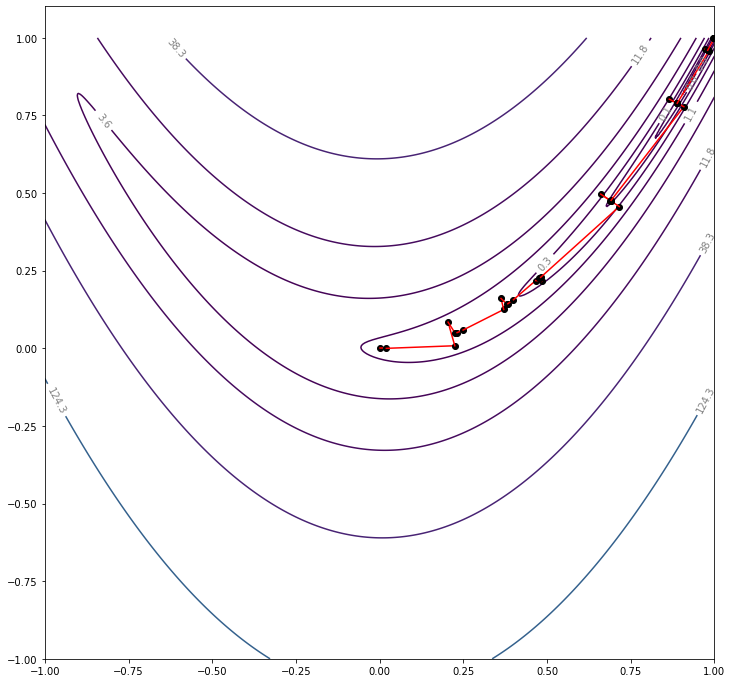

In [14]:
x = np.linspace(-1, 1, 400)
y = np.linspace(-1, 1, 400)
# xy are the locations of the horizontal grid with shape 2 x Ny x Nx
xy = np.array(np.meshgrid(x, y))
rxy = sop.rosen(xy)
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1, 1, 1)
# Choosing contour values is a bit tricky
# We want sufficient contours on the steep slope where the function
# increases rapidly, but also a number of contours in the bottom
# of the valley where the function only changes slowly.
# Therefore we choose a logarithmic range starting at 10^-2
# up until the maximum value encountered on the grid
cvalues = 10**np.linspace(-2, np.log10(rxy.max()), 10)
c = ax.contour(xy[0,...], xy[1,...], rxy, cvalues)
ax.clabel(c, cvalues, fmt='%1.1f', colors='grey')

ax.plot(x_n[0][0], x_n[0][1], 'ko')
for i in range(1, len(x_n)):
    ax.plot([x_n[i-1][0], x_n[i][0]], [x_n[i-1][1], x_n[i][1]], 'r')
    ax.plot(x_n[i][0], x_n[i][1], 'ko')

We observe that the trajectory follows a narrow valley that curves towards the solution at ${\bf x}=(1,1)$. The valley has steep sides and the bottom of the valley only descends slowly following a curve from (0,0) to (1,1). Although the trajectory roughly follows this curve, there seem to be quite a few spurious zig-zag movements in the iterations. Let's zoom in a bit further on the first 10 iterations:

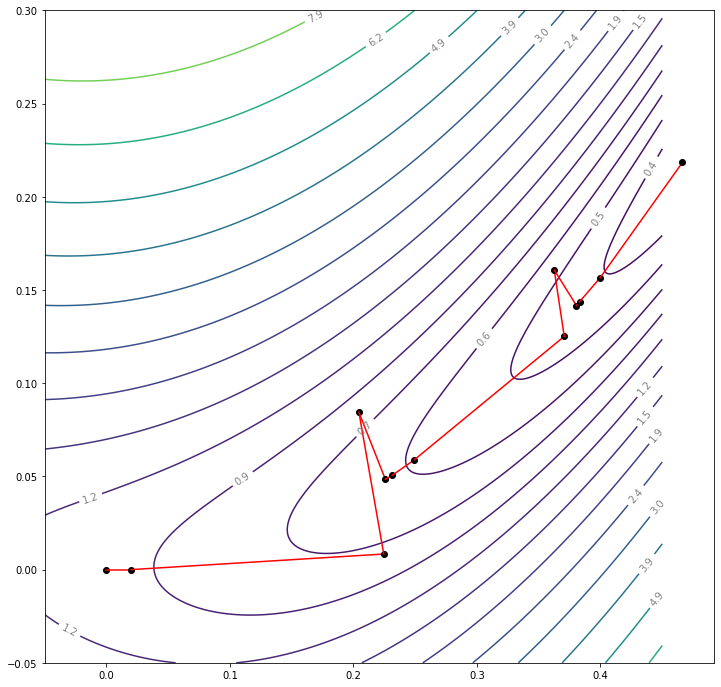

In [15]:
x = np.linspace(-.05, .45, 400)
y = np.linspace(-.05, .3, 400)
# xy are the locations of the horizontal grid with shape 2 x Ny x Nx
xy = np.array(np.meshgrid(x, y))
rxy = sop.rosen(xy)
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1, 1, 1)
cvalues = 10**np.linspace(-2, np.log10(rxy.max()), 30)
c = ax.contour(xy[0,...], xy[1,...], rxy, cvalues)
ax.clabel(c, cvalues, fmt='%1.1f', colors='grey')

ax.plot(x_n[0][0], x_n[0][1], 'ko')
for i in range(1, 13):
    ax.plot([x_n[i-1][0], x_n[i][0]], [x_n[i-1][1], x_n[i][1]], 'r')
    ax.plot(x_n[i][0], x_n[i][1], 'ko')

Although for small distances, the gradient descent direction appears to be a good direction to follow the bottom of the valley, downslope towards the minimum, if this direction is followed for too long the trajectory fails to follow the curved valley and shoots off-course. When this happens and we end up far away from the bottom of the valley, in the next iteration the gradient points us back downslope into the direction of the bottom of the valley, but we tend to overshoot, which means we need another tack back into the valley which creates the zig-zag pattern.

We can investigate if this pattern repeats if we start from different initial guesses. Here it is important to choose some relevant points with respect to the shape of the Rosenbrock function, e.g. what happens if we start from the opposite side of the minimum, say at (2,2), what happens if we start at a point far upslope away from the valley, say (4, -4), etc.

For x0=[0, 0], final distance to (1,1): 1.847262508043349e-08
For x0=[2, 2], final distance to (1,1): 1.0153008213737132e-08
For x0=[2, 4], final distance to (1,1): 1.7128204923003545e-09
For x0=[4, -4], final distance to (1,1): 8.777746281139365e-13
For x0=[-1, 1], final distance to (1,1): 1.062661240989502e-12
For x0=[10, 10], final distance to (1,1): 1.2958292431471607e-12
For x0=[-10, 10], final distance to (1,1): 1.2109561122242903e-09


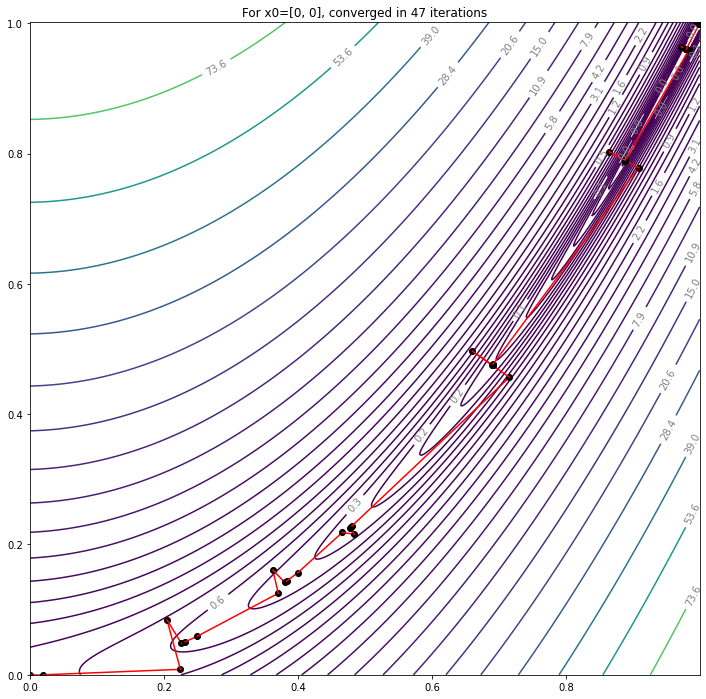

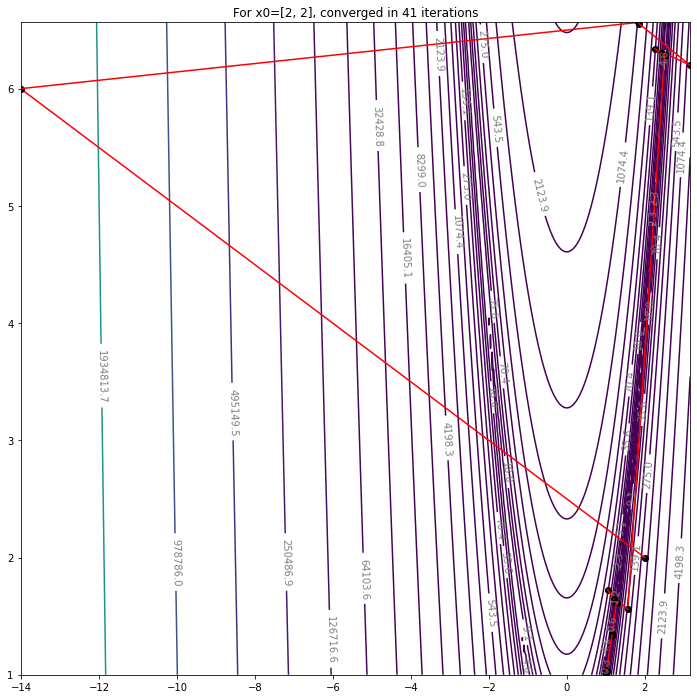

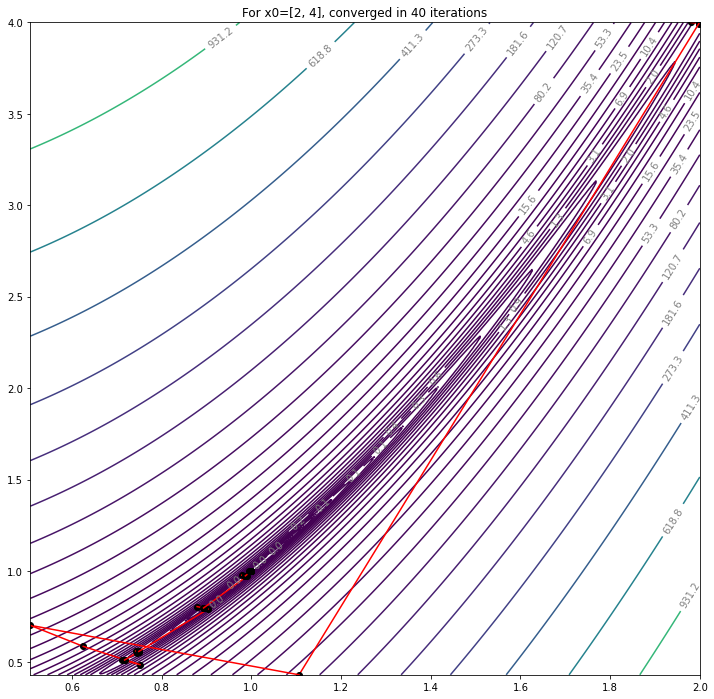

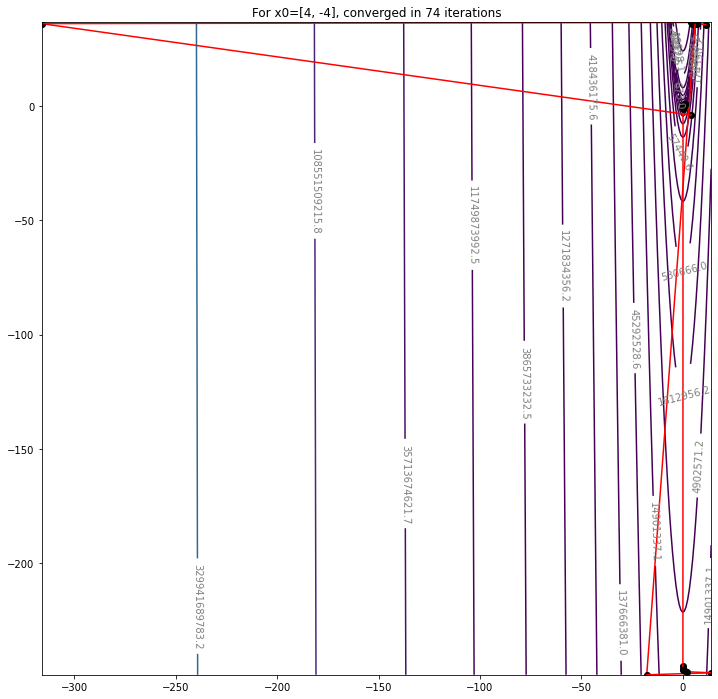

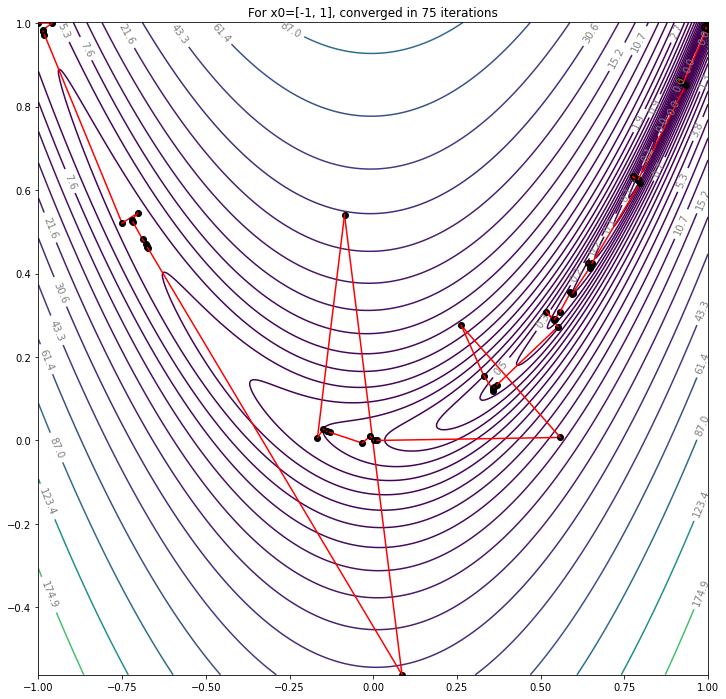

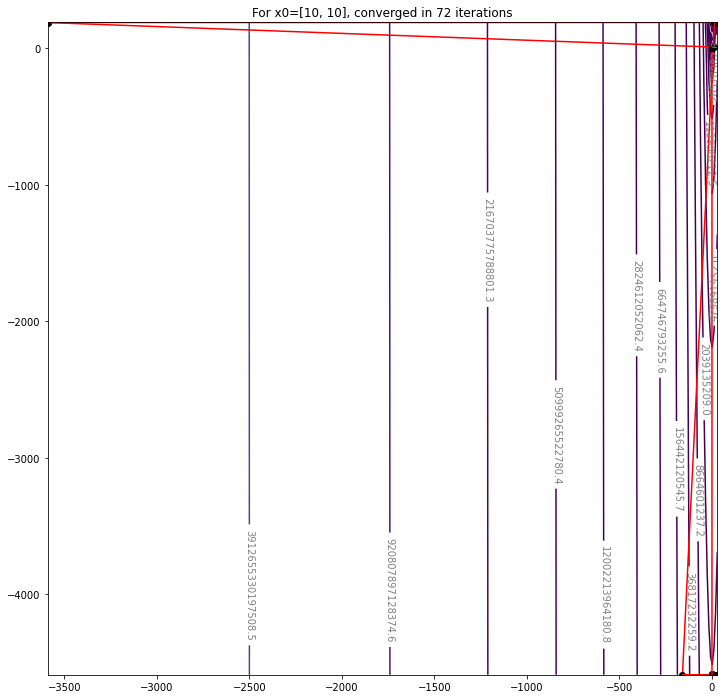

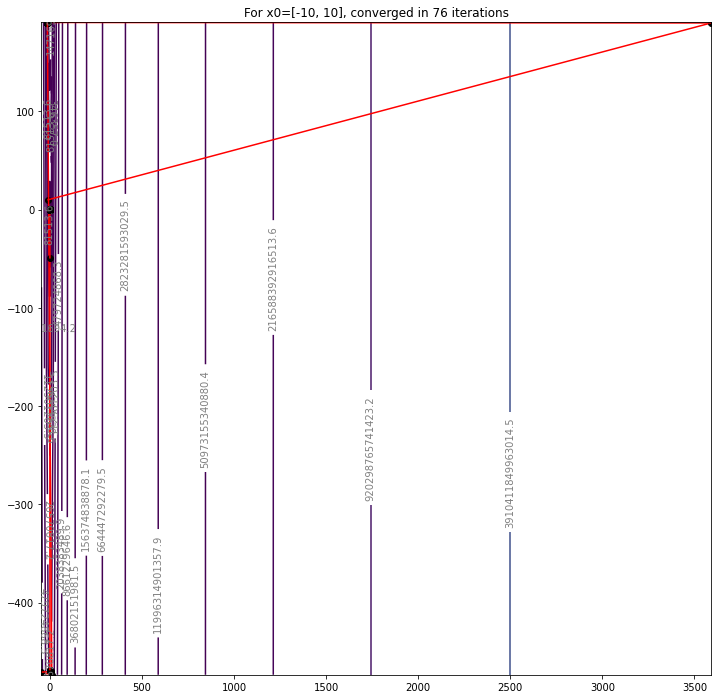

In [16]:
x0s = [[0,0],  # original x0
       [2,2],  # other side of (1,1)
       [2,4],  # also on the other side, but much more inside the valley
       [4,-4],  # some point far upslope
       [-1,1],  # a point inside the valley (close to its curved centre line)
       # folowing the curve "around the bend" further up than (0,0)
       [10,10],  # some points even further away
       [-10,10]]

for x0 in x0s:
    x_n, y_n = steepest_descent_bb(sop.rosen_der, x0)

    x_n = np.array(x_n)
    x = np.linspace(x_n[:,0].min(), x_n[:,0].max(), 400)
    y = np.linspace(x_n[:,1].min(), x_n[:,1].max(), 400)
    # xy are the locations of the horizontal grid with shape 2 x Ny x Nx
    xy = np.array(np.meshgrid(x, y))
    rxy = sop.rosen(xy)
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(1, 1, 1)
    cvalues = 10**np.linspace(-2, np.log10(rxy.max()), 30)
    c = ax.contour(xy[0,...], xy[1,...], rxy, cvalues)
    ax.clabel(c, cvalues, fmt='%1.1f', colors='grey')

    ax.plot(x_n[0][0], x_n[0][1], 'ko')
    for i in range(1, len(x_n)):
        ax.plot([x_n[i-1][0], x_n[i][0]], [x_n[i-1][1], x_n[i][1]], 'r')
        ax.plot(x_n[i][0], x_n[i][1], 'ko')
    # let us check we have actually converged to the solution (1, 1):
    print(f"For x0={x0}, final distance to (1,1):", sl.norm(x_n[-1]-[1,1]))
    ax.set_title(f"For x0={x0}, converged in {len(x_n)} iterations")


As we can observe the trajectory sometimes struggles to follow the curvature of the valley, flying off-course, quite far away from the bottom of the valley, but even for points that are relatively far away from the bottom the algorithm eventually manages to steer it back into it. This results in a fairly robust convergence (for this function) but often requires a fair number of iterations.

For comparison, we use the following implementation of Newton's algorithm from the lecture notes. Note that we need a version of the code that is valid for multiple dimensions here!

In [17]:
def newton_method(F, jac, x_0, atol = 1.e-8, maxiter=100):
    x_n = []
    y_n = []
    x = x_0
    
    # iterate until we hit break either as we hit tolerance or maximum number iterations
    # since we include the initial guess, the max. number of entries is maxiter+1
    for i in range(maxiter+1):
        x_n.append(x)
        Fx = F(x)
        y_n.append(Fx)
        dFdx = jac(x)
        p = sl.solve(dFdx, -Fx)
        x = x + p
        if sl.norm(Fx) < atol:
            break
    
    return x_n, y_n

 We are using Newton's method to minize a function $f$ by finding a stationary point where $f'(\bf x)=0$, thus to use the code above, we set `F` to $f'$, i.e. `F=rosen_der`, and `jac` (the first derivative of `F`) to `F=rosen_hess`, the second derivative of $f$.

Let's try this method out using the same sequence of initial guesses:

For x0=[0, 0], final distance to (1,1): 0.0
For x0=[2, 2], final distance to (1,1): 6.45458879844291e-15
For x0=[2, 4], final distance to (1,1): 2.0605033471952366e-13
For x0=[4, -4], final distance to (1,1): 0.0
For x0=[-1, 1], final distance to (1,1): 1.7486981853308442e-13
For x0=[10, 10], final distance to (1,1): 0.0
For x0=[-10, 10], final distance to (1,1): 0.0


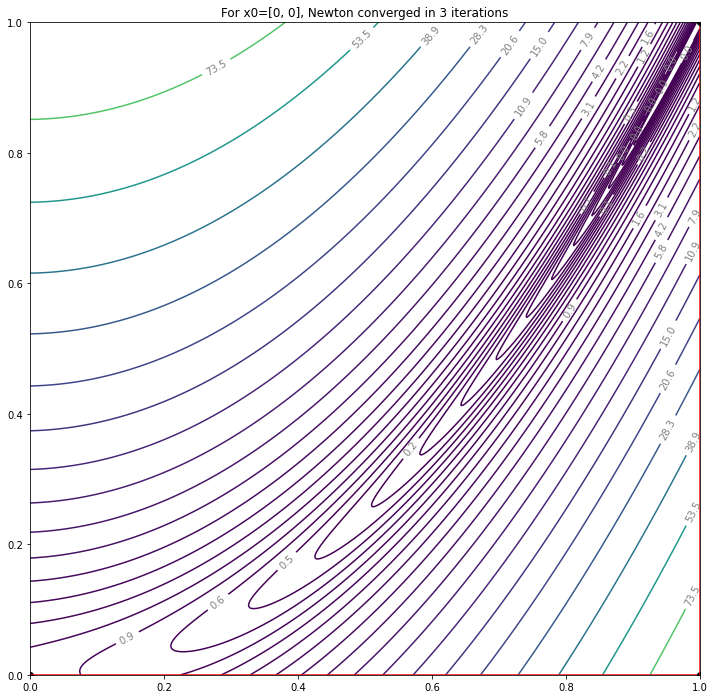

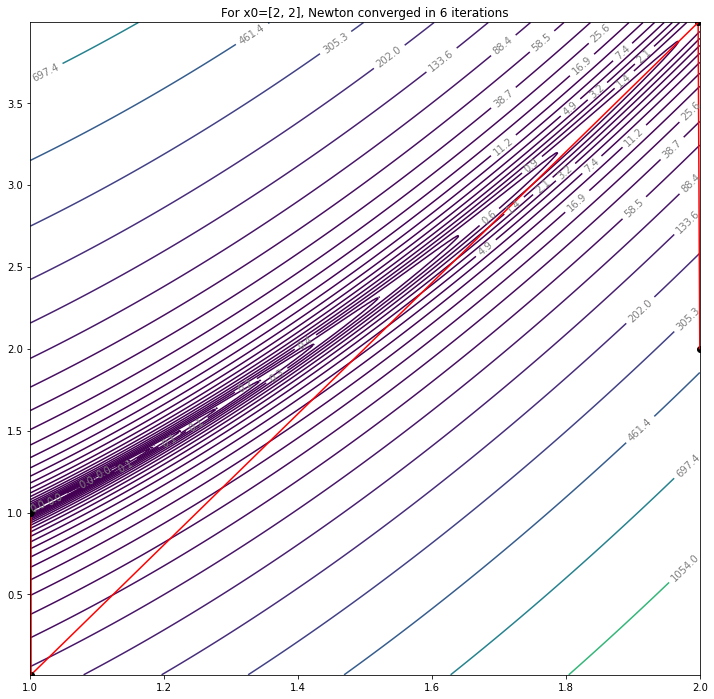

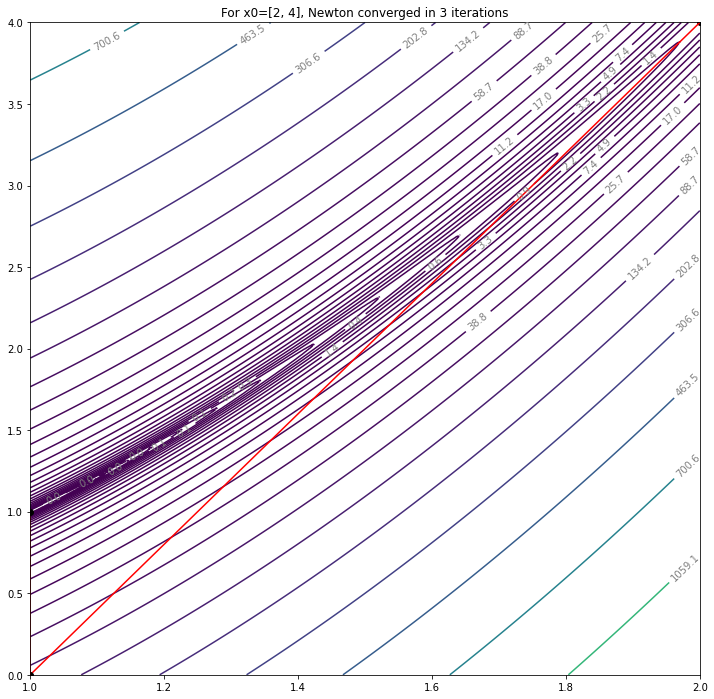

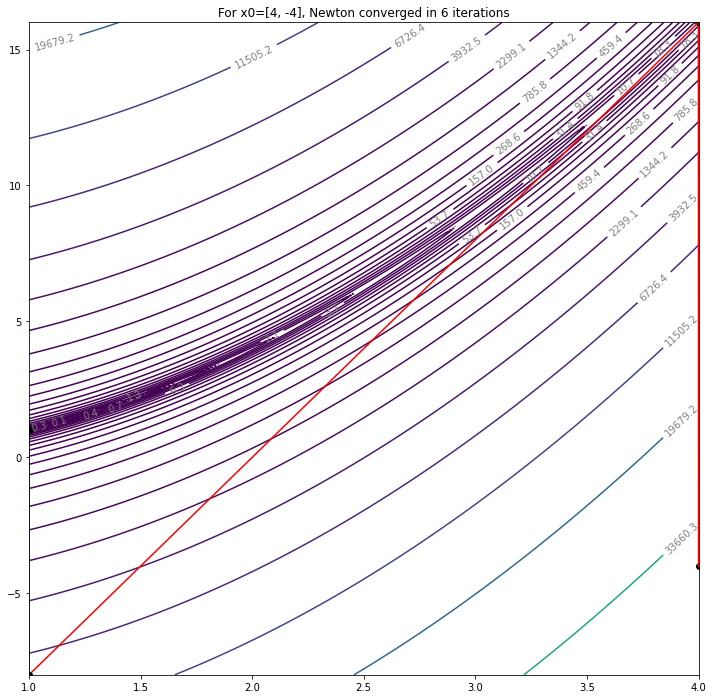

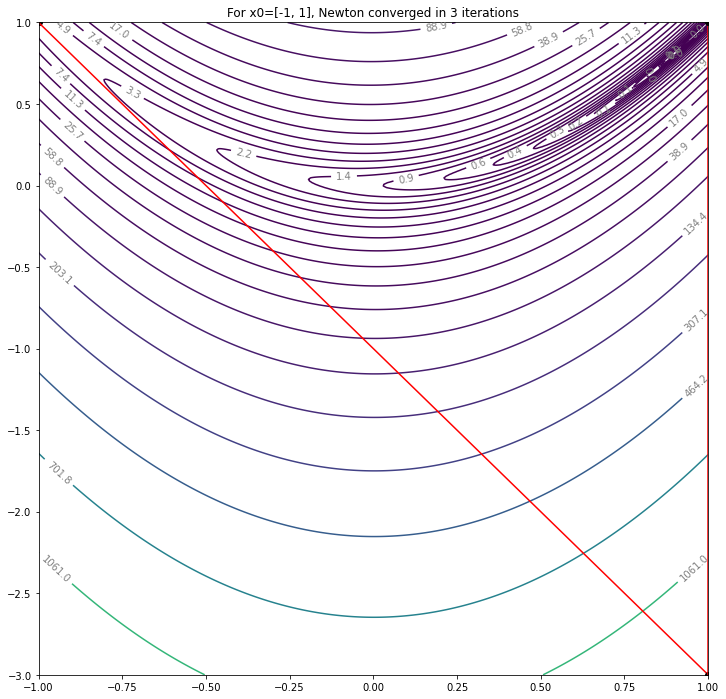

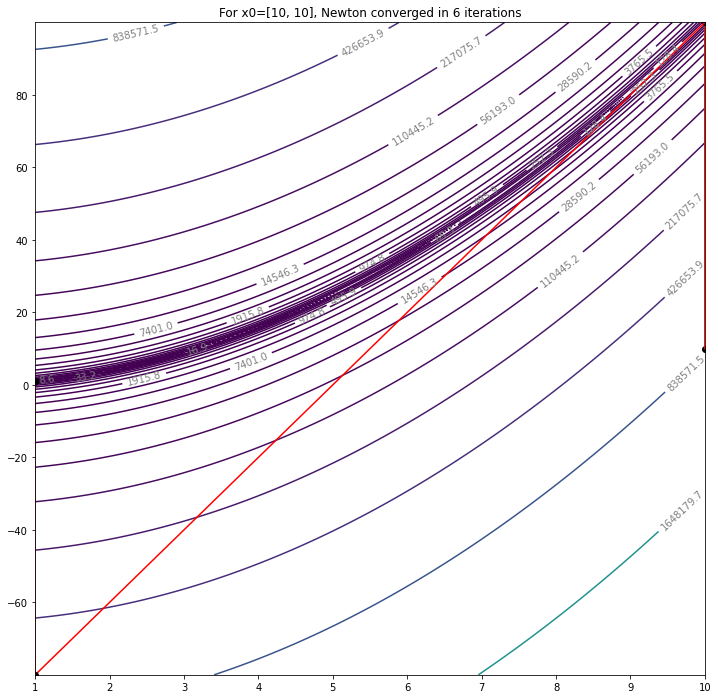

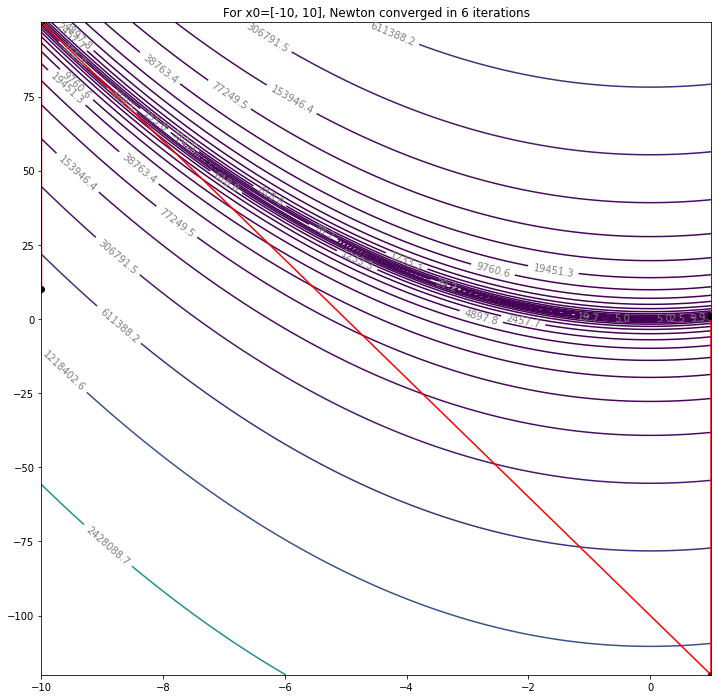

In [18]:
x0s = [[0,0], # original x0
       [2,2], # other side of (1,1)
       [2,4], # also on the other side, but much more inside the valley
       [4,-4], # some point far upslope
       [-1,1], # a point inside the valley (close to its curved centre line)
       # folowing the curve "around the bend" further up than (0,0)
       [10,10], [-10,10]]

for x0 in x0s:
    x_n, y_n = newton_method(sop.rosen_der, sop.rosen_hess, x0)

    x_n = np.array(x_n)
    x = np.linspace(x_n[:,0].min(), x_n[:,0].max(), 400)
    y = np.linspace(x_n[:,1].min(), x_n[:,1].max(), 400)
    # xy are the locations of the horizontal grid with shape 2 x Ny x Nx
    xy = np.array(np.meshgrid(x, y))
    rxy = sop.rosen(xy)
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(1, 1, 1)
    cvalues = 10**np.linspace(-2, np.log10(rxy.max()), 30)
    c = ax.contour(xy[0,...], xy[1,...], rxy, cvalues)
    ax.clabel(c, cvalues, fmt='%1.1f', colors='grey')

    ax.plot(x_n[0][0], x_n[0][1], 'ko')
    for i in range(1, len(x_n)):
        ax.plot([x_n[i-1][0], x_n[i][0]], [x_n[i-1][1], x_n[i][1]], 'r')
        ax.plot(x_n[i][0], x_n[i][1], 'ko')
    ax.set_title(f"For x0={x0}, Newton converged in {len(x_n)} iterations")
    
    # let us check we have actually converged to the solution (1, 1):
    print(f"For x0={x0}, final distance to (1,1):", sl.norm(x_n[-1]-[1,1]))

We find that Newton's method converges much faster than the Steepest Descent method. As we have learned in the lectures, this is because Newton's method gives us a much better local (quadratic) approximation of the function, than Steepest Descent. It appears that for the Rosenbrock function Newton's method is actually fairly robust, converging for a large variety of initial guesses. Of course we know that this is not the case for many other functions where we may need line search or trust region methods to ensure convergence from arbitrary initial guesses.

A good answer, next to a correct implementation of the Barzilai-Borwein algorithm, should show that the implementation has been evaluated and tested for correctness, for a range of suitably chosen initial guesses, some figures that show the trajectories, and a clear description of what is observed.

Some pointers of things that went wrong for a number of students:

\- we are using the Steepest Descent and Newton method here for _minimisation_, that is we are trying to find a stationary point where $f'(\bf x)=0$. For Steepest descent this means you need to provide it with the gradient `sop.rosen_der()` and Newton's method needs the first and second derivative `sop.rosen_der()` and `sop.rosen_hess()`

\- you need to check that the method you have implemented actually converges, e.g. visually or by printing the final $\bf x$ value

\- quite a few people forgot to take the absolute value as indicated in the formula for $\alpha$ to avoid the method going uphill rather than downhill in some cases

\- you need to implement a sensible stopping criterion for your algorithm. Simply running it for a fixed number of iterations does not tell you much about how quickly the algorithm has converged. If you use a stalling criterion, only checking the difference between two subsequent iterates, you run the risk of the algorithm stopping seemingly succesfully, despite not having converged to a point where $f'(\bf x)=0$

\- when you compare Steepest Descent and Newton's method, make sure you use the same stopping criterion with the same tolerance, to obtain a fair comparison

----

## Section D - Image Smoothing

In lecture 3 we saw how a discrete Laplace operator can be used to smoothen/blur an image. We solve the following linear system:

$$
  \left[\underline{\mathbf I} + m \underline{\mathbf A}\right]
  \boldsymbol{u}_{\text{smooth}} = \boldsymbol{u}_{\text{orig}}
$$

where $\boldsymbol{u}_{\text{orig}}$ is the original image and $\boldsymbol{u}_{\text{smooth}}$ the smoothed image we solve for. $\underline{\mathbf I}$ is the identity matrix, $\underline{\mathbf A}$ is the discrete Laplace operator, and $m$ is a positive constant. The images $\boldsymbol{u}_{\text{orig}}$ and $\boldsymbol{u}_{\text{smooth}}$ are stored as flattened vectors, where an image of $N_y\times N_x$ is stored as single vector of length $n=N_yN_x$.

To read in the original image, you may use the following code:

In [19]:
import matplotlib.pyplot as plt
# reads in an image of Ny x Nx x 4
# where the last dimension represents three RGB colour channels and an alpha channel
img = plt.imread('london_road.png')

# convert to black and white, by averaging over the RGB channels (dropping the alpha channel)
img_bw = img[:,:,:3].sum(axis=-1)/3

# flatten into vector of length Nx*Ny
u_orig = img_bw.flatten()

print(img_bw.shape, u_orig.shape)

(674, 450) (303300,)


which we can display using

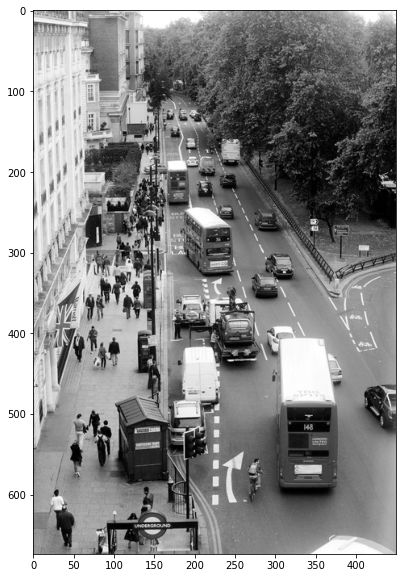

In [20]:
fig, ax = plt.subplots(1, figsize=(17,10))
ax.imshow(u_orig.reshape(img_bw.shape), cmap='gray');

The discrete Laplace operator matrix can be obtained from the following piece of code:

In [21]:
import numpy as np
import scipy.sparse as sp

def Laplace(Ny, Nx):
    """ Assembles a discrete Laplace operator with Neumann boundary conditions
    into a sparse matrix.
    """
    # construct matrix from 5 (off-)diagonals
    # we provide the diagonals as one 5 x n array
    # the actual off-diagonals should of course be shorter
    # but dia_matrix cuts them off for us
    n = Nx*Ny
    offsets = [-Nx, -1, 0, 1, Nx]
    diags = -np.ones((5,n))
    diags[2] = -diags[2]*4  # main diagonal should be positive and 4 times the off-diagonals
    A = sp.dia_matrix((diags, offsets), shape=(n,n)).tocsr()
    
    # grid point in the right-most column, should not be connected to
    # the grid point in the first column on the next row
    for i in range(1,Ny):
        A[i*Nx-1, i*Nx] = 0
        A[i*Nx, i*Nx-1] = 0
        
    # for homogenous Neumann boundary conditions all we have to do is
    # make sure that the diagonal is set such that the row sum is zero
    # This replaces some of the 4 values on the diagonal with the actual number
    # of connected grid points on the boundary:
    A.setdiag(A.diagonal() - np.array(A.sum(axis=1)).flatten())
    
    return A

A = Laplace(img_bw.shape[0], img_bw.shape[1])

* What are the properties of the matrix $\left[\underline{\mathbf I} + m \underline{\mathbf A}\right]$? Based on your answer choose an appropriate iterative solver and produce a smoothened image with $m=10$ using a solver from https://docs.scipy.org/doc/scipy/reference/sparse.linalg.html

### Answer <a class="tocSkip"></a>

From the lecture notes we may immediately state that $\left[\underline{\mathbf I} + m \underline{\mathbf A}\right]$ is Symmetric and Positive Definite for positive $m$ (\*) From this we conclude that the Conjugate Gradient method is the obvious, most appropriate choice for an iterative solver.

(\*) Contrary to what some students claimed, the discrete Laplace operator $\underline{\mathbf A}$ with Neumann boundary conditions on its own is positive semi-definite, not positive definite. But the combination $\left[\underline{\mathbf I} + m \underline{\mathbf A}\right]$ is SPD.

We produce the image with the following code:

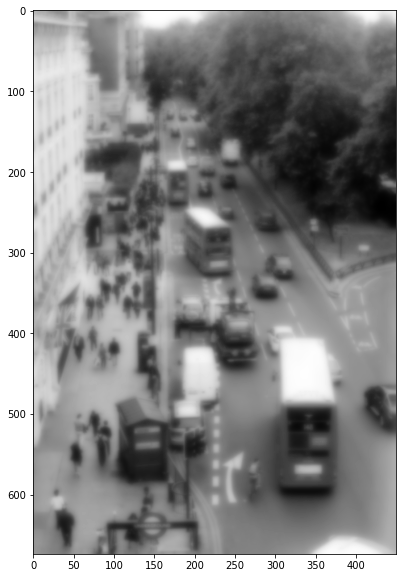

In [22]:
m = 10
n = len(u_orig)
u_smooth, info = spl.cg(sp.identity(n) + m*A, u_orig)
fig, ax = plt.subplots(1, figsize=(17,10))
ax.imshow(u_smooth.reshape(img_bw.shape), cmap='gray');

-----

We would now like to consider a spatially varying smoothing filter, where the amount of smoothing in each grid point is controlled by the entries in _vector_ $\bf m$ of length $n=NyNx$. We can do this by solving
$$
  \left[\underline{\mathbf I} + \operatorname{diag}(\bf m) \underline{\mathbf A}\right]
  \boldsymbol{u}_{\text{smooth}} = \boldsymbol{u}_{\text{orig}}
$$
where $\operatorname{diag}(\bf m)$ is the diagonal matrix with the entries of $\bf m$ on its main diagonal. Its role is to scale each row of $\underline{\mathbf A}$ with the corresponding value of $\bf m$.

An example for a spatially varying $\bf m$ is set up in the code below:

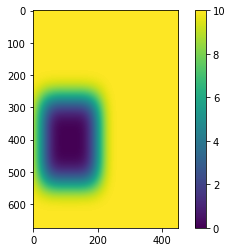

In [23]:
# set up x and y coordinate vectors for the grid
Ny, Nx = img_bw.shape
x, y = np.meshgrid(np.linspace(0,1,Nx), np.linspace(0,1,Ny))
x = x.flatten()
y = y.flatten()

# blur everywhere except for an area around (0.25,0.6)
m = (1-np.exp(-((y-0.6)**4 + (x-0.25)**4)*500))*10

# plot the values of the m vector
plt.imshow(m.reshape(img_bw.shape))
plt.colorbar();

* Assemble the matrix $\left[\underline{\mathbf I} + \operatorname{diag}(\bf m) \underline{\mathbf A}\right]$ (hint you may find [scipy.sparse.diags](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.diags.html) useful) and investigate its properties. Solve the linear system using an iterative solver from scipy.sparse.linalg and show the resulting image.

### Answer <a class="tocSkip"></a>
The matrix is given by

In [24]:
n = len(u_orig)
M = sp.identity(n) + sp.diags(m) @ A

Despite what some of you thought, this matrix is *not* symmetric:

In [25]:
print((M - M.T).max(), (M - M.T).min())

0.16036117263314065 -0.16036117263314065


The reason for this is that $\operatorname{diag}(\bf m)\underline{\mathbf A}\neq \underline{\mathbf A}\operatorname{diag}(\bf m)$, and therefore

$$
  \left[\underline{\mathbf I} + \operatorname{diag}(\bf m) \underline{\mathbf A}\right]^T = 
  \underline{\mathbf I}^T + \underline{\mathbf A}^T \operatorname{diag}(\bf m) ^T =
  \underline{\mathbf I} + \underline{\mathbf A} \operatorname{diag}(\bf m) \neq \left[\underline{\mathbf I} + \operatorname{diag}(\bf m) \underline{\mathbf A}\right]
$$

(remember the transpose of the product of two matrices, is the product in the _reverse order_ of the tranpose of these matrices). The fact that $\operatorname{diag}(\bf m)\underline{\mathbf A}$ and $\underline{\mathbf A}\operatorname{diag}(\bf m)$ are not the same follows from the fact that the former product multiplies each row of $\underline{\mathbf A}$ with the corresponding entries of $\bf m$, but the latter multiplies the columns of $\underline{\mathbf A}$ with these entries. Therefore for two entries $m_i$ and $m_j$ with $m_i\neq m_j$, we get $\left[\operatorname{diag}(\bf m)\underline{\mathbf A}\right]_{ij}=m_i A_{ij}$ but $\left[\underline{\mathbf A}\operatorname{diag}(\bf m)\right]_{ij}=A_{ij} m_j$.

Since the matrix is not symmetric, we should not use the Conjugate Gradient method here (as a matter of fact CG does appear to converge for the given $\bf m$ but this is coincidental and will not be true for abritrary $\bf m$). An appropriate choice therefore is the generally robust GMRES method:

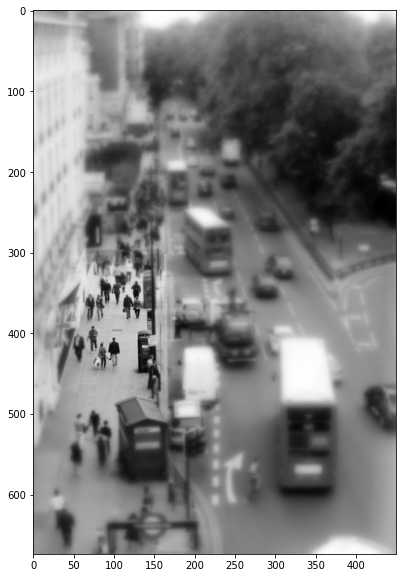

In [26]:
import scipy.sparse.linalg as spl
n = len(u_orig)
M = sp.identity(n) + sp.diags(m) @ A
u_smooth, info = spl.gmres(M, u_orig)
fig, ax = plt.subplots(1, figsize=(17,10))
ax.imshow(u_smooth.reshape(img_bw.shape), cmap='gray');

-----------

In the file 'london_road_tilt.png' you'll find the result of the same spatially varying smoothing process but based on an unknown vector $\bf m$. We would like to find out what vector $\bf m$ has been used to produce that image. We can do this by formulating the following PDE-constrained optimisation problem:

$$
  \text{minimize} f({\bf u}, {\bf m})\;\;
  \text{subject to }g({\bf u}, {\bf m}) = 0
$$

where

$$
  f(\bf u, \bf m) = \| \bf u - \bf{u_{\text target}} \|^2
$$

is the functional that measures the difference between the image 'london_road_tilt.png' stored as the vector $\bf{u_{\text target}}$ and an image $\bf u$ that satisfies the PDE constraint

$$
  g(\bf u, \bf m) \equiv \left[\underline{\mathbf I} + \operatorname{diag}(\bf m) \underline{\mathbf A}\right] {\bf u} - \bf{u_{\text orig}} = \bf 0
$$

where $\bf u_{\text orig}$ represents the original image 'london_road.png'. 

* Implement the reduced functional $\hat f({\bf m})$ associated with this PDE-constrained optimisation problem and implement its derivative
$$
  \frac{\partial \hat f({\bf m})}{\partial {\bf m}}
$$
Make sure you appropriately test this derivative!

**Hint:** one of the derivatives that you might need is given by
    
$$
  \frac{\partial g({\bf u}, {\bf m})}{\partial{\bf m}}
  =\operatorname{diag}(\underline{\mathbf A}{\bf u})
$$

### Answer <a class="tocSkip"></a>
This is the most challenging question of this first part and requires the correct implementation of the adjoint to the PDE-constrained problem. Quite a few students managed to succesfully implement this, but points were also awarded for a correct description of the procedure.

The tangent linear approach is not appropriate here as that is only efficient to compute the derivative with respect to a single (or small number of) parameter(s), whereas here we need the derivative with respect to very many parameters, namely all entries in the vector $\bf m$.

The three steps to calculate the gradient $\partial\hat f({\bf m})/\partial {\bf m}$ were given in lecture 7. Let's work these out in a little more detail for this specific case:

1. Solve the PDE constraint $g(u, m)=0$ to obtain $u=u(m)$

This is, by construction, the same as what we did in the previous question, i.e. solving:

$$
\left[\underline{\mathbf I} + \operatorname{diag}(\bf m) \underline{\mathbf A}\right] {\bf u} = \bf{u_{\text orig}}
$$

2. Solve the adjoint equation using $m$ and $u(m)$ for $\lambda$, such that $\frac{\partial\mathcal{L}(u, m, \lambda)}{\partial u}=0$

The adjoint equation is given by:

$$
  \frac{\partial\mathcal{L}(u, m, \lambda)}{\partial u} = \frac{\partial f(u,m)}{\partial u} - \lambda\cdot \frac{\partial g(u, m)}{\partial u} = 0 
$$

or (taking the tranpose):

$$
\underset{\bf U\times U}{\left(\frac{\partial g({\bf u}, {\bf m})}{\partial {\bf u}}\right)^T}
  \underset{\bf U\times 1}{\lambda} = \underset{\bf U\times 1}{\left(\frac{\partial f({\bf u},{\bf m})}{\partial {\bf u}}\right)^T}
$$

(note that $\partial f/\partial {\bf u}$ is interpreted as a row vector here, so that $(\partial f/\partial {\bf u})^T$ is a column vector),
and we thus need the partial derivatives and 

$$
\frac{\partial f({\bf u}, {\bf m})}{\partial {\bf u}} = 
\frac{\partial \left(\bf u - \bf{u_{\text target}}\right)^T
 \left(\bf u - \bf{u_{\text target}}\right)}{\partial {\bf u}}
 =2\left(\bf u - \bf{u_{\text target}}\right)^T
$$

and

$$
\frac{\partial g({\bf u}, {\bf m})}{\partial {\bf u}} = 
\left[\underline{\mathbf I} + \operatorname{diag}(\bf m) \underline{\mathbf A}\right]
$$

3. The derivative of the reduced functional is now given by

$$
  \frac{d\hat f(m)}{dm} = \frac{\partial\mathcal{L}(u, m, \lambda)}{\partial m} = \frac{\partial f(u,m)}{\partial m} - \lambda\cdot \frac{\partial g(u, m)}{\partial m}
$$

This is now simply substitution of the solution $\bf u$ and $\lambda$ obtained in steps 1 and 2. The functional $f$ does not _explicitly_ depend on $m$, and thus the _partial_ derivative $\partial f/\partial {\bf m}=0$. The partial derivative $\partial g/\partial{\bf m}$ is given in the hint.

To start we need to set up the ${\bf u}_{\text{target}}$ vector by loading the 'london_road_tilt.png' image. We keep ${\bf u}_{\text{orig}}$ (from `london_road.png` as before). Both vectors will be used in the functions below, and also the matrix `A` that is consistent with their size, but these do not change during the calculations. A better code structure might have been to store these as a attributes on a class, with the functions below implemented as methods, but we'll keep things simple here:

In [27]:
# same steps as above for u_orig:
img = plt.imread('london_road_tilt.png')
img_bw = img[:,:,:3].sum(axis=-1)/3
u_target = img_bw.flatten()

print(img_bw.shape, u_target.shape)

(674, 450) (303300,)


Let us first implement the three partial derivatives we encountered above (leaving out $\partial f/\partial{\bf m}$ which is zero):

In [28]:
def f(u, m):
    return (u-u_target) @ (u-u_target)

def dfdu(u, m):
    return 2*(u-u_target)

def g(u, m):
    n = len(u_orig)
    M = sp.identity(n) + sp.diags(m) @ A
    return M @ u - u_orig

def dgdu(u, m):
    n = len(u_orig)
    return sp.identity(n) + sp.diags(m) @ A
    
def dgdm(u, m):
    return sp.diags(A @ u)

As always it's good to test the implementation of any code that calculate derivatives for which we can use the Taylor test code from lecture 5. Note: a correct test for the individual partial derivatives wasn't required for a full score, but we work it out here because a few students tried this (very good) but obtained results they couldn't explain. You *do* need to test the final implementation of $d\hat{f}/dm$ using the same Taylor test, as we do further below.

In [40]:
def taylor_test(f, grad_f, x, h0, max_iter=8, plot_convergence=True, print_convergence=True):
    """Taylor test to verify that the function grad_f is the derivative of the function `f`
    
    We test:
    
       f(x + h) = f(x) + grad_f(x).h + O(h^2)
    
    f, grad_f  - function and its derivative to test
    x          - point in which to test
    h0         - initial perturbation
    max_iter   - number of times that h is halved
    plot_convergence - whether to plot the convergence of the Taylor residual f(x+h)-f(x)-grad_f(x).h
    print_convergence - prints the order of convergence between subsequent iterations."""


    h = h0.copy()
    residuals = []
    hnorms = []
    # these two stay the same, so we can compute them outside the loop:
    fx = f(x)
    dfdx = grad_f(x)
    
    for i in range(max_iter):
        if len(h.shape)>1:
            # tensordot sums over all indices of h and corresponding last indices of dfdx
            r = f(x + h) - fx - np.tensordot(dfdx, h, axes=len(h.shape))
        else:
            r = f(x + h) - fx - dfdx @ h
            
        residuals.append(sl.norm(r))
        hnorms.append(sl.norm(h))
        h /= 2.

    if plot_convergence:
        fig, ax = plt.subplots(1,2, figsize=(16,4))
        ax[0].semilogy(residuals)
        ax[0].set_xlabel('iteration')
        ax[0].set_ylabel('Taylor residual $|r|$')
        ax[0].set_xticks(range(0,max_iter,2))
        ax[1].loglog(hnorms, residuals)
        ax[1].set_xlabel('perturbation size $\|h\|$')
        ax[1].set_ylabel('Taylor residual $|r|$')

    if print_convergence:
        residuals = np.array(residuals)
        print('Order of convergence, log(r(h_i)/r(h_{i+1}))/log(2):')
        print(np.log(residuals[:-1]/residuals[1:])/np.log(2))

To use this we need to provide a function that only takes one argument (the input variable that is varied in the Taylor approximation). Therefore we need a version of `f` and `dfdu` that only takes `u` as input and keeps `m` fixed (in fact `f` and `dfdu` don't even depend on `m` in this case so we can provide it with anything):

Order of convergence, log(r(h_i)/r(h_{i+1}))/log(2):
[2.         2.         2.         2.         2.00000002 2.00000003
 2.00000009]


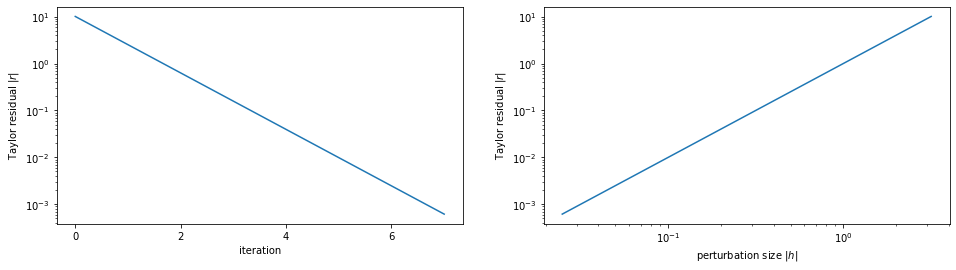

In [41]:
# make f and dfdu a function of u only
n = len(u_orig)
m = np.zeros(n)
def f_m(u):
    return f(u,m)
def dfdu_m(u):
    return dfdu(u, m)

# choose appropriate point to evaluate Taylor test
u = np.random.random(n)
# and a perturbation vector
h = 0.01 * np.random.random(n)
taylor_test(f_m, dfdu_m, u, h)

So far so good. For `dgdu` and `dgdm` however this will not give the desired result. This is because `g` is actually linear in both `u` and in `m`, which means that if we look at the Taylor residual:

$$
  g({\bf u}+{\bf h}, {\bf m}) - g({\bf u}, {\bf m}) -
  \frac{\partial g({\bf u}, {\bf m})}{\partial{\bf u}}
  \cdot {\bf h} = 0
$$

and similar for perturbations in $\bf m$:

$$
  g({\bf u}, {\bf m}+{\bf h}) - g({\bf u}, {\bf m}) -
  \frac{\partial g({\bf u}, {\bf m})}{\partial{\bf m}}
  \cdot {\bf h} = 0
$$

In other words the Taylor residual is exactly zero for arbitrary $\bf h$ because all high order terms in the Taylor series (involving higher derivatives) are zero. Thus we should not expect the Taylor residual to converge quadratically as we reduce $\bf h$, it is zero already!

What we can check is that indeed the Taylor residual is (practically) zero for arbitrary $\bf h$:

In [31]:
# choose appropriate point to evaluate Taylor test
u = np.random.random(n)
m = np.random.random(n)
# and a perturbation vector
h = 0.01 * np.random.random(n)
print("Taylor residual for u perturbation:",
      sl.norm(g(u+h, m) - g(u, m) - dgdu(u,m) @ h))
print("Taylor residual for m perturbation:",
      sl.norm(g(u, m+h) - g(u, m) - dgdm(u,m) @ h))

Taylor residual for u perturbation: 1.1620488961676258e-13
Taylor residual for m perturbation: 1.319727381239196e-13


Let us now first implement the reduced functional $\hat{f}({\bf m})=f({\bf u}({\bf m}), {\bf m})$, where ${\bf u}({\bf m})$ is the solution $\bf u$ for given $\bf m$:

In [32]:
def fhat(m):
    # this is the same as the previous question
    n = len(u_orig)
    M = sp.identity(n) + sp.diags(m) @ A
    u, info = spl.gmres(M, u_orig)
    return f(u, m)

and finally the derivative $d\hat{f}/d{\bf m}$ using the three steps detailed above:

In [33]:
def dfhatdm(m):
    # step 1: solve for u=u(m) (same as in fhat())
    n = len(u_orig)
    M = sp.identity(n) + sp.diags(m) @ A
    u, info = spl.gmres(M, u_orig)
    
    # step 2: solve the adjoint equation
    Madj = dgdu(u, m).T  # this is in fact just the transpose of M above
    rhs = dfdu(u, m)
    # again Madj is asymmetric, so we use gmres
    lam, info = spl.gmres(Madj, rhs)
    
    # step 3: substitute u, and lambda and use \partial f/\partial m=0
    result = -lam @ dgdm(u, m)
    return result

Order of convergence, log(r(h_i)/r(h_{i+1}))/log(2):
[1.79804277 1.95942227 1.93345204 1.88074149 1.78981575 1.65477623
 1.48872075]


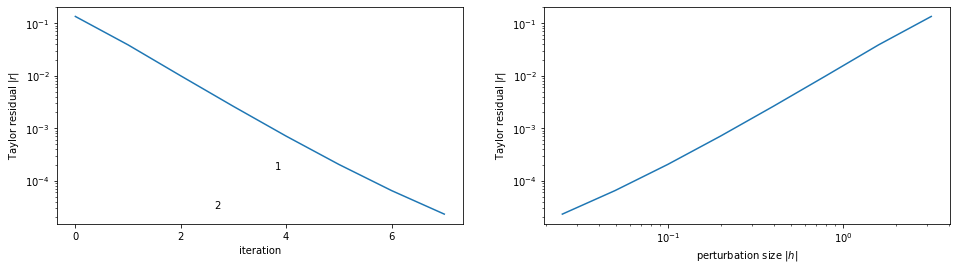

In [34]:
# choose appropriate point to evaluate Taylor test
m = np.random.random(n)
# and a perturbation vector
h = 0.01 * np.random.random(n)
taylor_test(fhat, dfhatdm, m, h)

Although we get near 2nd order convergence initially, the convergence order seems to reduce again afterwards. This is because we are only solving the linear systems involved with limited (default) precision. If we reimplement the functions with tighter tolerances, we get a better result (you can also replace with direct solves using `spsolve`):

Order of convergence, log(r(h_i)/r(h_{i+1}))/log(2):
[1.98278819 1.99127491 1.99556927 1.99769167 1.9986709  1.99898841
 1.99880115]


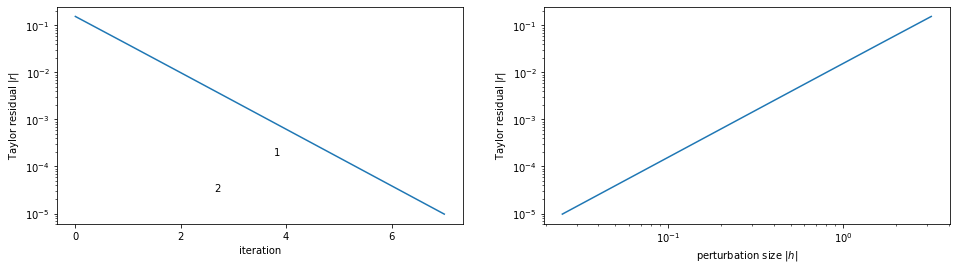

In [35]:
rtol = 1e-8  # relative tolerance used in solves:

def fhat(m):
    # this is the same as the previous question
    n = len(u_orig)
    M = sp.identity(n) + sp.diags(m) @ A
    u, info = spl.gmres(M, u_orig, tol=rtol)
    return f(u, m)

def dfhatdm(m):
    # step 1: solve for u=u(m) (same as in fhat())
    n = len(u_orig)
    M = sp.identity(n) + sp.diags(m) @ A
    u, info = spl.gmres(M, u_orig, tol=rtol)
    
    # step 2: solve the adjoint equation
    Madj = dgdu(u, m).T  # this is in fact just the transpose of M above
    rhs = dfdu(u, m)
    # again Madj is asymmetric, so we use gmres
    lam, info = spl.gmres(Madj, rhs, tol=rtol)
    
    # step 3: substitute u, and lambda and use \partial f/\partial m=0
    result = -lam @ dgdm(u, m)
    return result

# choose appropriate point to evaluate Taylor test
m = np.random.random(n)
# and a perturbation vector
h = 0.01 * np.random.random(n)
taylor_test(fhat, dfhatdm, m, h)

* Using only the reduced functional $\hat f({\bf m})$ and its derivative, describe an optimisation algorithm that we might use to solve the PDE constrained optimisation problem and motivate your choice. You do not need to perform this optimisation here! In trying out such an algorithm we find poor convergence and very noisy solutions; Describe why this might be the case and what we could do to improve the situation. We also find a number of other images that have had the same smoothing applied, based on the same unknown vector $\bf m$. Describe how we might use these to improve the accuracy of the inversion problem.

This final question is an open-ended question.
Firstly, since we have access to the derivative of $\hat f$ through the `dfhatdm` function we just implemented, we should be thinking to use a gradient-based algorithm to solve this PDE-constrained minimisation problem. For the efficient minimisation of general nonlinear function Newton's method is the obvious choice, but it requires access to the second derivative (the Hessian) as well which we don't have. Therefore a quasi-Newton method is more viable, and since it is a minimisation problem where the Hessian (which is approximated in the algorithm) is symmetric, the BFGS or L-BFGS algorithm is a good choice here.

Noisy solutions in inversion problems tend to occur if the local perturbations to the inverse solution have practically no or very small effect on the misfit functional. This is exactly what we can imagine happens for this problem: an increase in $m$ in one gridpoint smears out (diffuses) the image over some gridpoints around that gridpoint. Therefore the same increase in m in a neighbouring gridpoint has a very similar effect, which is to say that an increase in $m$ in one gridpoint combined with a decrease in a neighbouring gridpoint has little effect on the resulting image. This problem will be exacerbated if the input image is already very smooth in some location, say we have some small area with constant intensity/colour, then local changes in the value of m in that area will not have much effect on the resulting image as that area is smoothed already. We can see these perturbations that have little effect on the output as being close to the rank deficient (mixed determined) case: in that case we have perturbations that have exactly zero effect, i.e. they are null vectors, but here we might have perturbations that have practically zero effect (smaller than the precision we may expect in the inversion). The general remedy for such issues is _regularisation_. We are in a situation where very many solutions give very similar results, and we want to say that from these solutions we are only interested in the smooth ones. We can do this by adding a penalty on the noisy perturbations in the functional.

Another remedy may be to make the problem better constrained through the inclusion of more images, i.e. we have more "training data" in the form of multiple input images ${\bf u}_{\text{orig}}$ and smoothed output images ${\bf u}_{\text{target}}$ all smoothed with the same unknown diffusion vector $\bf m$. This would help for instance in the case where one input image is smooth or constant in one area, if other input images do have more variation in that area it will better constrain the diffusion values $m$ in that area. We can simply implement this by making the functional a sum of the misfits for multiple images that have been smoothed.